# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Import Datasets

Forecasting **future sales based on historical data** while taking into account seasonality effects, demand, holidays, promotions, and competiotions

This project contains data from 1115 stores. (for learning purpose only)

### Understanding the data



*   **Id**: transaction ID (combination of Store and date)
*   **Store**: unique store Id
*   **Sales**: sales/day, this is the target variable 
*   **Customers**: number of customers on a given day
*   **Open**: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
*   **Promo**: describes if store is running a promo on   that day or not
*   **StateHoliday**: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
*   **SchoolHoliday**: indicates if the (Store, Date) was affected by the closure of public schools

*   **StoreType**: categorical variable to indicate type of store (a, b, c, d)
*   **Assortment**:  a = basic, b = extra, c = extended
*   **CompetitionDistance** (meters): distance to closest competitor store
*   **CompetitionOpenSince** [Month/Year]:  date when competition was open
*   **Promo2**: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
*   **Promo2Since** [Year/Week]: date when store started participating in Promo2
*   **PromoInterval**: describes the consecutive intervals Promo2 is started, naming the months promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store






### Importing the dataset

In [2]:
# Uploading the store information data

# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

store_dataset = pd.read_csv('store.csv')
store_dataset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
# Importing the sales training data

# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

sales_dataset = pd.read_csv('train.csv')
sales_dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


# Preparing and Exploring the Data

## Sales Train dataset

In [4]:
sales_dataset.describe()

# Customers: Average of 633 customers
# Sales: Average of 5773 Euros per day
# Stores: 1017209 stores data in this dataset

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,700582.000000,700582.000000,700581.000000,700581.000000,700581.000000,700581.000000,700581.000000
mean,558.599821,4.000816,5871.305696,637.858385,0.828851,0.378916,0.171993
std,321.938418,2.000160,3918.223347,468.292995,0.376640,0.485117,0.377375
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,2.000000,3794.000000,410.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5844.000000,614.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7989.000000,843.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


In [5]:
store_dataset.describe()

# Competitors distance on average: 5404 meters
# All columns will be used as features


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


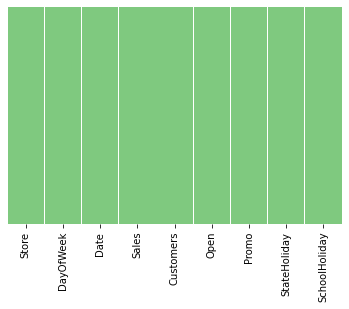

In [6]:
# Checking for missing data

# There is no missing data on this dataframe

df_null = sales_dataset.isnull()
sns.heatmap(df_null, yticklabels=False, cbar=False, cmap = 'Accent')

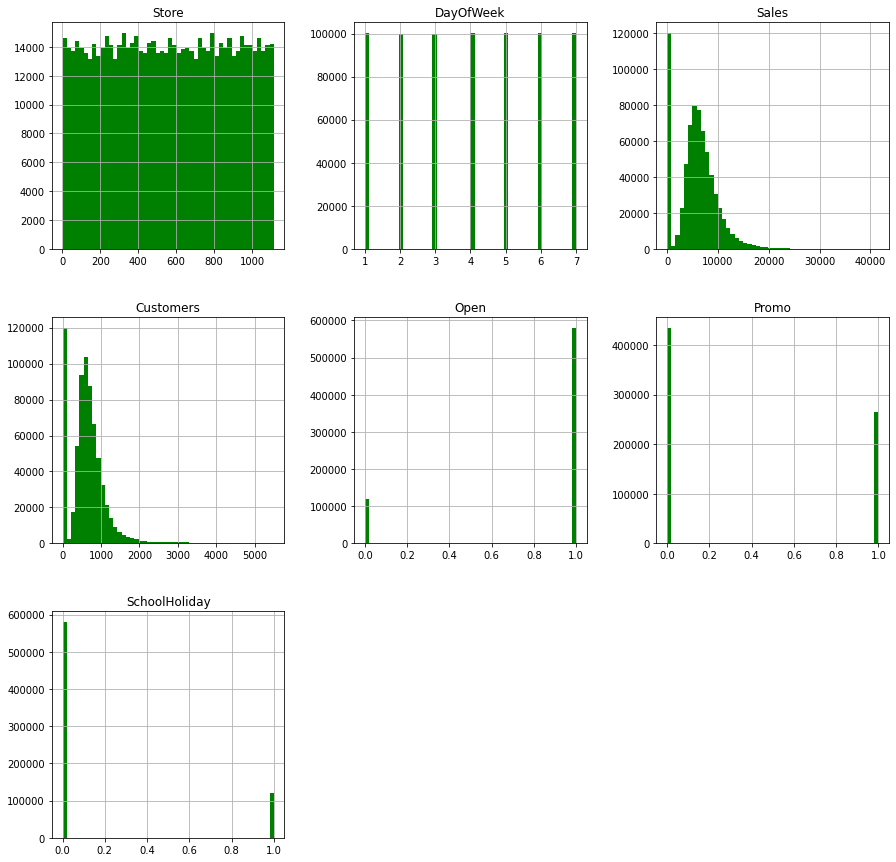

In [7]:
# Plotting histograms for the Sales dataset

ax = sales_dataset.hist(bins = 50, figsize = (15,15), color = 'green')

# The data is distributed equaly across the week
# Sales decreases in school holidays
# Data is equaly distributed across the stores


In [8]:
# Stores are open 80% of the time

open = sales_dataset[sales_dataset['Open']==1]
closed = sales_dataset[sales_dataset['Open']==0]

print('Total = ',len(sales_dataset))
print('Number of stores that are open: ', len(open))
print('Percentage store that are open: ', 1.*len(open)/len(sales_dataset)*100, '%')

print('Number of stores that are closed: ', len(closed))
print('Percentage store that are closed: ', 1.*len(closed)/len(sales_dataset)*100, '%')

Total =  700582
Number of stores that are open:  580677
Percentage store that are open:  82.88494423208132 %
Number of stores that are closed:  119904
Percentage store that are closed:  17.114913029452655 %


In [9]:
# Filtering the dataset to only the lines of Open stores

sales_dataset = sales_dataset[sales_dataset['Open']==1]
sales_dataset.drop(['Open'], axis = 1, inplace = True)
sales_dataset.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(580677, 8)

In [10]:
# Actual average os sales is = 6955 Euros and Number os Customers = 762
sales_dataset.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,580677.000000,580677.000000,580677.000000,580677.000000,580677.000000,580677.000000
mean,558.565108,3.515051,7083.671673,769.569769,0.443849,0.184483
std,321.801103,1.726857,3151.919242,404.005009,0.496838,0.387878
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,2.000000,4955.000000,525.000000,0.000000,0.000000
50%,558.000000,3.000000,6480.000000,681.000000,0.000000,0.000000
75%,838.000000,5.000000,8508.000000,899.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000


## Stores dataset

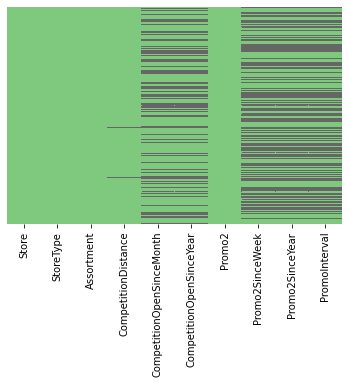

In [11]:
# Checking for missing data

# There a lot of  missing data on this dataframe

df_null = store_dataset.isnull()
sns.heatmap(df_null, yticklabels=False, cbar=False, cmap = 'Accent')

In [12]:
# Treating the missing values

display(store_dataset[store_dataset['CompetitionDistance'].isnull()])
display(store_dataset[store_dataset['CompetitionOpenSinceMonth'].isnull()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
display(store_dataset[store_dataset['Promo2'].isnull()])
display(store_dataset[store_dataset['Promo2SinceWeek'].isnull()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [14]:
# Deleting columns that are not relevant (toomuch null values):
del_col = ['Promo2SinceWeek',  'Promo2SinceYear', 
           'PromoInterval', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear']

for n in del_col:
  store_dataset[n].fillna(0, inplace = True)





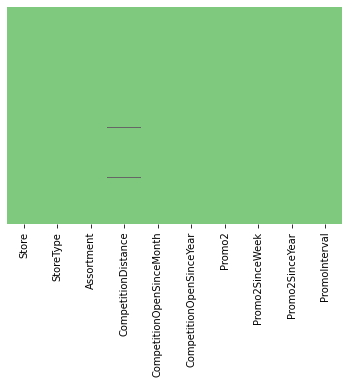

In [15]:
# Checking how is now
df_null = store_dataset.isnull()
sns.heatmap(df_null, yticklabels=False, cbar=False, cmap = 'Accent')

In [16]:
# Treating the misisng data of CompetitionDistance

store_dataset['CompetitionDistance'].fillna(store_dataset['CompetitionDistance'].mean(), inplace = True)

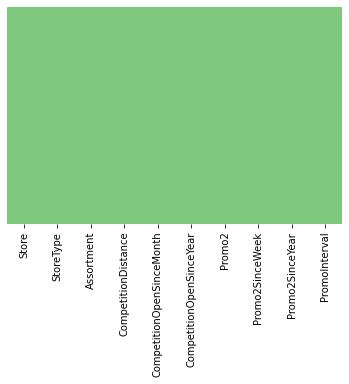

In [17]:
sns.heatmap(store_dataset.isnull(), yticklabels=False, cbar=False, cmap = 'Accent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a08c49cd0>,
      dtype=object)

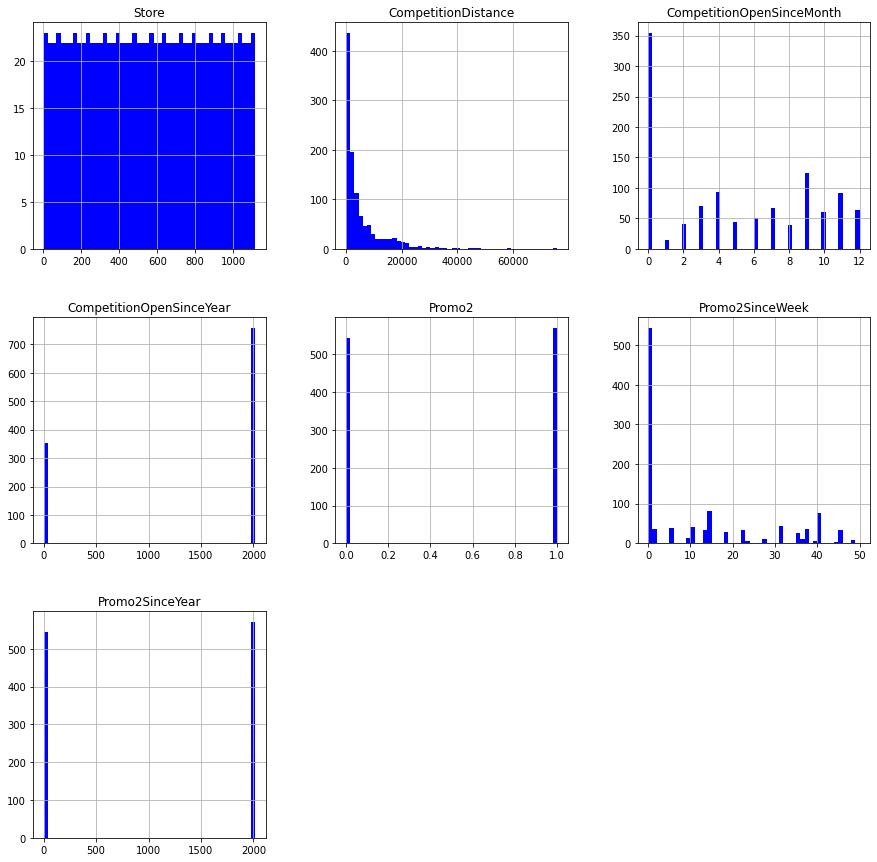

In [18]:
# Plotting Histograms

store_dataset.hist(bins = 50, figsize = (15,15), color = 'blue')

## Merging the two datasets

Store column is the best to use to merge the two dataframes

In [19]:
sales_dataset.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555.0,1.0,0,1.0
1,2,5,2015-07-31,6064.0,625.0,1.0,0,1.0
2,3,5,2015-07-31,8314.0,821.0,1.0,0,1.0


In [20]:
store_dataset.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [23]:
# Merging

all_dataset = pd.merge(sales_dataset, store_dataset, how = 'inner', on = 'Store')
all_dataset.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020.0,546.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782.0,523.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## Checking the correlations between the features

In [24]:
correlations = all_dataset.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.180087
Promo2SinceYear             -0.121367
Promo2                      -0.121343
Promo2SinceWeek             -0.054248
CompetitionDistance         -0.033834
CompetitionOpenSinceMonth   -0.026338
CompetitionOpenSinceYear    -0.004646
Store                        0.005679
SchoolHoliday                0.038140
Promo                        0.369583
Customers                    0.819776
Sales                        1.000000
Name: Sales, dtype: float64

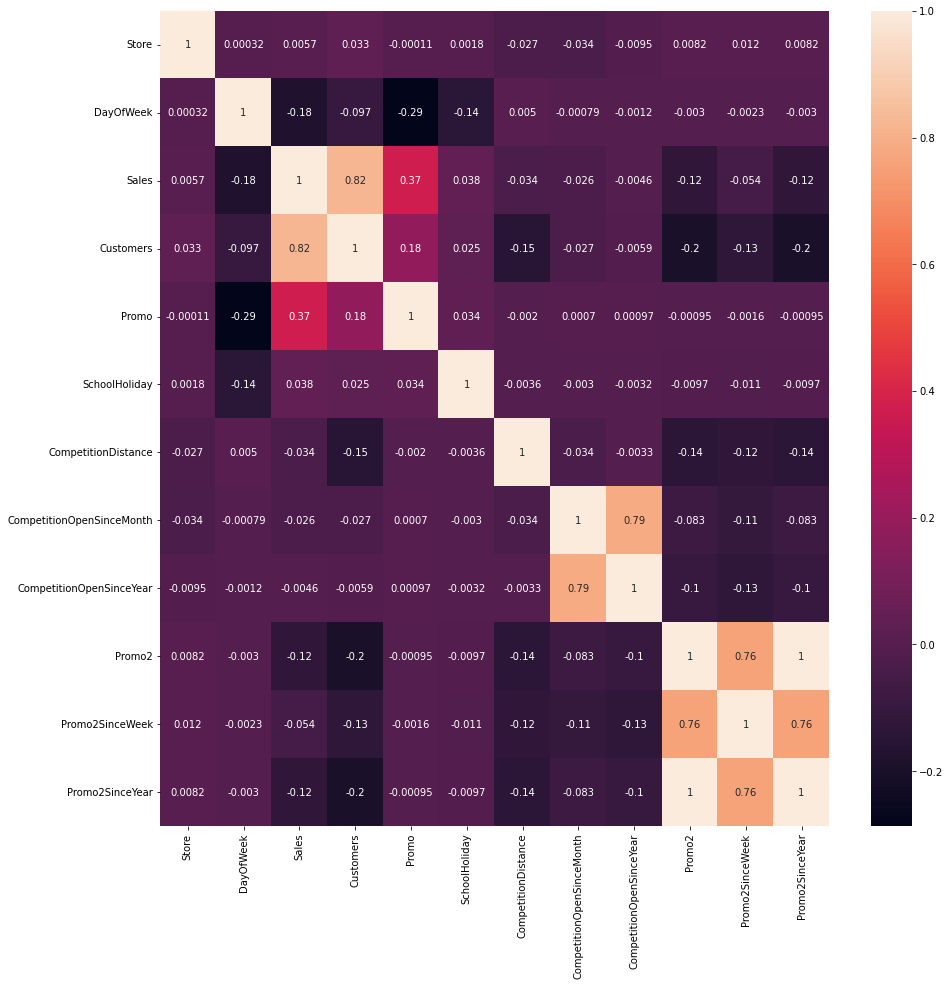

In [27]:
#Visualizing with a heatmap

correlations = all_dataset.corr()
g, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot = True)

# Data Visualization

In [28]:
# Treating the date

all_dataset['Year'] = pd.DatetimeIndex(all_dataset['Date']).year
all_dataset['Month'] = pd.DatetimeIndex(all_dataset['Date']).month
all_dataset['Day'] = pd.DatetimeIndex(all_dataset['Date']).day
all_dataset.head(3)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263.0,555.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020.0,546.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782.0,523.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29


Text(0.5, 1.0, 'Average Customers per Month')

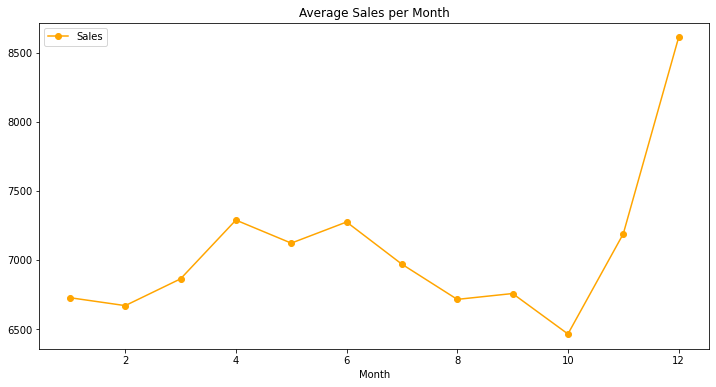

<Figure size 432x288 with 0 Axes>

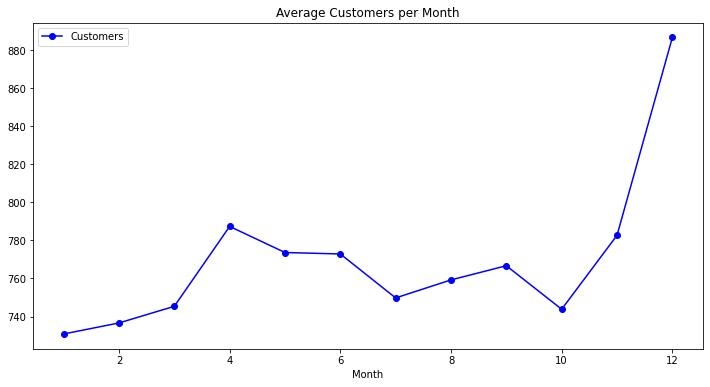

In [35]:
# Average sales and number of customer per Month

ax = all_dataset.groupby('Month')[['Sales']].mean().plot(figsize = (12,6), marker = 'o', color = 'orange')
ax.set_title('Average Sales per Month')

plt.figure()

ax = all_dataset.groupby('Month')[['Customers']].mean().plot(figsize = (12,6), marker = 'o', color = 'blue')
ax.set_title('Average Customers per Month')

# Sales and customers has pick around november and december

Text(0.5, 1.0, 'Average Customers per Day')

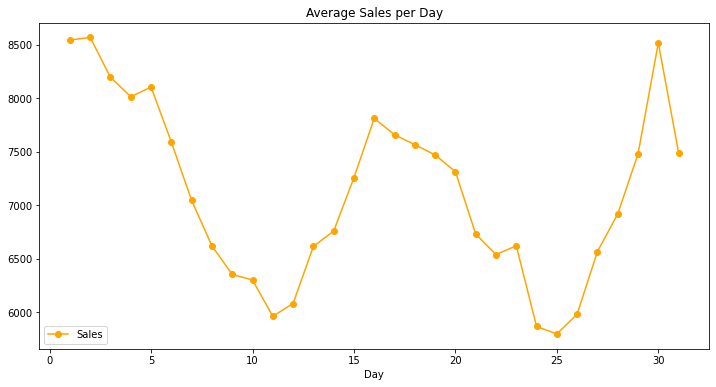

<Figure size 432x288 with 0 Axes>

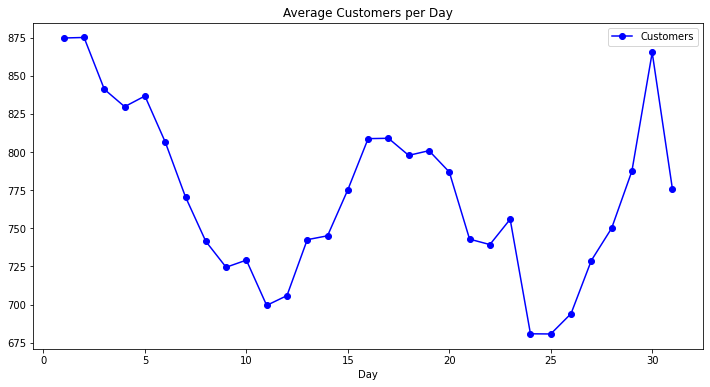

In [37]:
# Checking the average sales and customers per day

ax = all_dataset.groupby('Day')[['Sales']].mean().plot(figsize = (12,6), marker = 'o', color = 'orange')
ax.set_title('Average Sales per Day')

plt.figure()

ax = all_dataset.groupby('Day')[['Customers']].mean().plot(figsize = (12,6), marker = 'o', color = 'blue')
ax.set_title('Average Customers per Day')



Text(0.5, 1.0, 'Average Customers per Day of the Week')

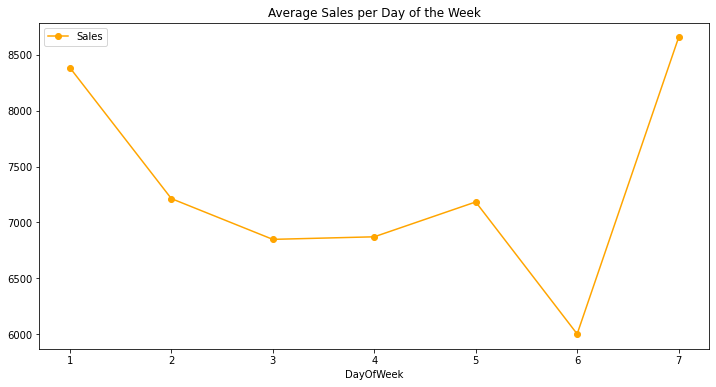

<Figure size 432x288 with 0 Axes>

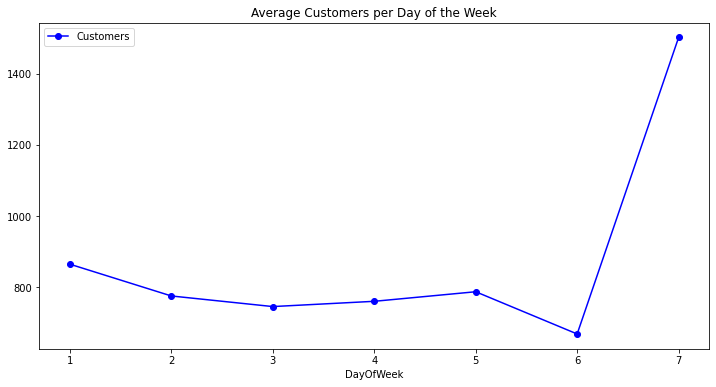

In [38]:
# Checking the average sales and customers per day of the week

ax = all_dataset.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (12,6), marker = 'o', color = 'orange')
ax.set_title('Average Sales per Day of the Week')

plt.figure()

ax = all_dataset.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (12,6), marker = 'o', color = 'blue')
ax.set_title('Average Customers per Day of the Week')

# Pick of sales and customers on sunday

### Conclusion is that there is an influence of seasonality

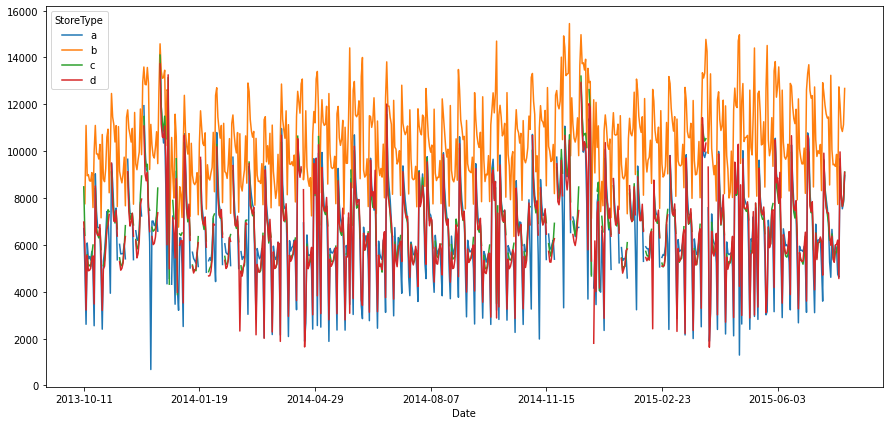

In [40]:
fig, ax = plt.subplots(figsize = (15,7))

all_dataset.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

# Store b has high amount of sales

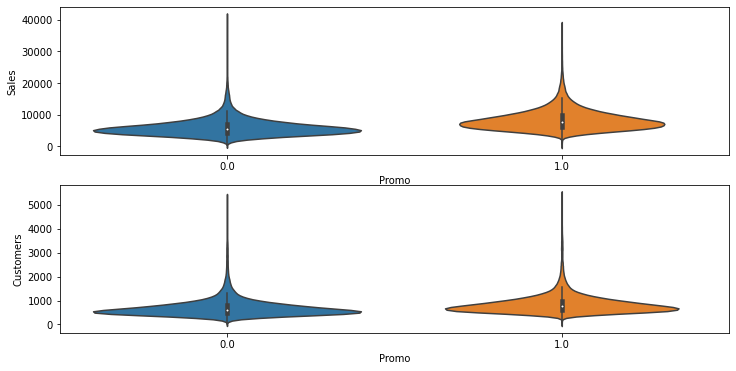

In [46]:
# checking if the promos has any effect on sales

plt.figure(figsize = (12, 6))
plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = all_dataset)
plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = all_dataset)

# Sales and customers are higher with promo

# Using Facebook Prophet

**Facebook Prophet** is highly used for a time series and the data has strong seasonal effects and several seasons of historical data.

## Making predictions (time series only)

In [48]:
# Install fbprophet

! pip install fbprophet

  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, but you have cmdstanpy 0.9.5 which is incompatible.


In [50]:
# Import fbprophet

from fbprophet import Prophet

In [59]:
# Predictions

# Creating a df with sales data from one specific store and period:

selected_store = 250
periods = 120  #future days

sales_store = all_dataset[all_dataset['Store'] == selected_store]

# For the fbprophet, df must have columns "ds" and "y" with the dates and values respectively.

sales_store = sales_store[['Date', 'Sales']].rename(columns = {'Date' : 'ds', 'Sales' : 'y'})
sales_store = sales_store.sort_values('ds')

# Training the model and predicting for this specific store

model = Prophet()
model.fit(sales_store)
future_df = model.make_future_dataframe(periods = periods)
predictions = model.predict(future_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


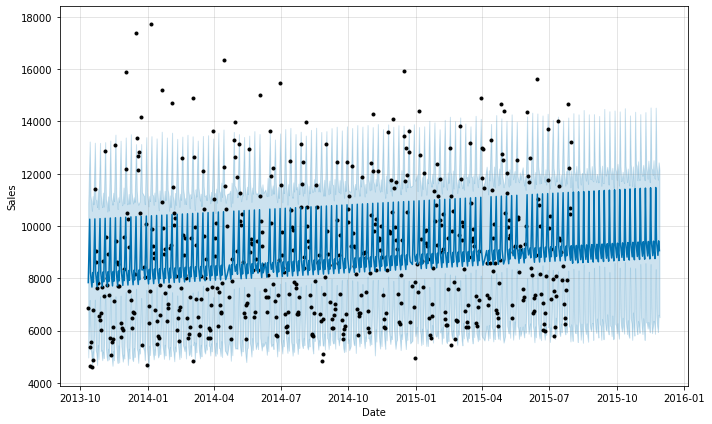

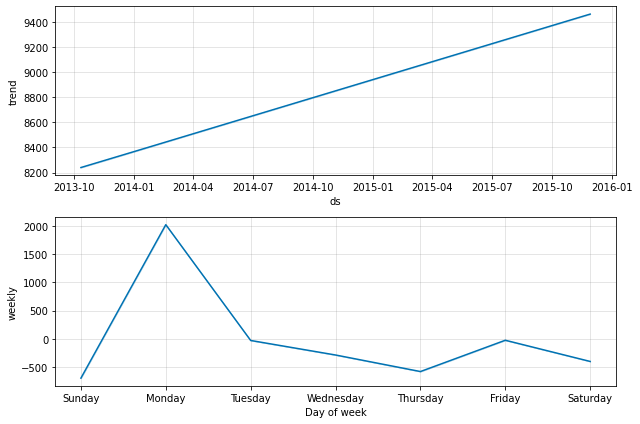

In [60]:
# Plotting the result

ax = model.plot(predictions, xlabel = 'Date', ylabel = 'Sales')
ax2 = model.plot_components(predictions)

## Making predictions considering the holidays

---



In [66]:
# There are two types of holydays, school holidays and state holydays

school_holidays = all_dataset[all_dataset['SchoolHoliday'] == 1].loc[:, 'Date'].values

state_holidays = all_dataset[(all_dataset['StateHoliday'] == 'a')|(all_dataset['StateHoliday'] == 'b')|(all_dataset['StateHoliday'] == 'c')].loc[:, 'Date'].values

school_holidays = pd.DataFrame({'ds' : pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})

state_holidays = pd.DataFrame({'ds' : pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

display(school_holidays.shape)
display(state_holidays.shape)

(107125, 2)

(612, 2)

In [67]:
# Concatenate both holidays

holidays_all = pd.concat((state_holidays,school_holidays))
holidays_all.head(3)

,ds,holiday
0,2014-10-03,state_holiday
1,2015-06-04,state_holiday
2,2014-06-19,state_holiday


In [68]:
# Predictions

# Creating a df with sales data from one specific store and period, considering the holidays:

selected_store = 250
periods = 120  #future days
holidays = holidays_all

sales_store = all_dataset[all_dataset['Store'] == selected_store]

# For the fbprophet, df must have columns "ds" and "y" with the dates and values respectively.

sales_store = sales_store[['Date', 'Sales']].rename(columns = {'Date' : 'ds', 'Sales' : 'y'})
sales_store = sales_store.sort_values('ds')

# Training the model and predicting for this specific store

model = Prophet(holidays=holidays_all)
model.fit(sales_store)
future_df = model.make_future_dataframe(periods = periods)
predictions = model.predict(future_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


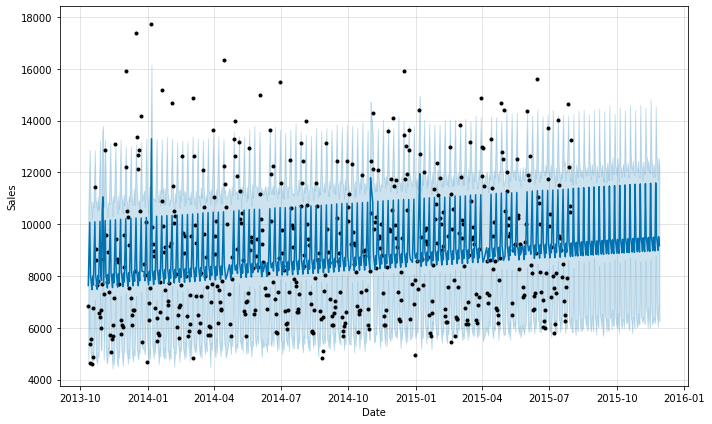

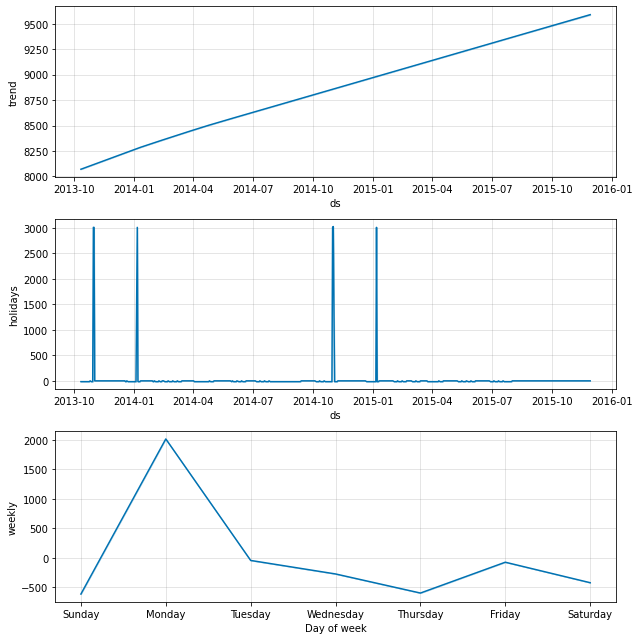

In [69]:
# Plotting the result

ax = model.plot(predictions, xlabel = 'Date', ylabel = 'Sales')
ax2 = model.plot_components(predictions)